### Problem Statement:
**The objective is to predict house price based on the various features.**

In [1]:
### Importing all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
df = pd.read_csv('train (4).csv')

In [3]:
## Top 5 records
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Understanding the dataset**

In [4]:
### shape od dataset
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
### all info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Feature Information**
- **SalePrice:** the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **ullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **unctional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GaarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality
- **Fence:** Fence quality
- **MiscFeature** Miscellaneous feature not covered in other categories
- **MiscVal:** $Value of miscellaneous feature
-  **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
### Checking for null values
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [9]:
## The features having missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().sum()/len(df)*100, 4),  ' % missing values')

LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 0.5479  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


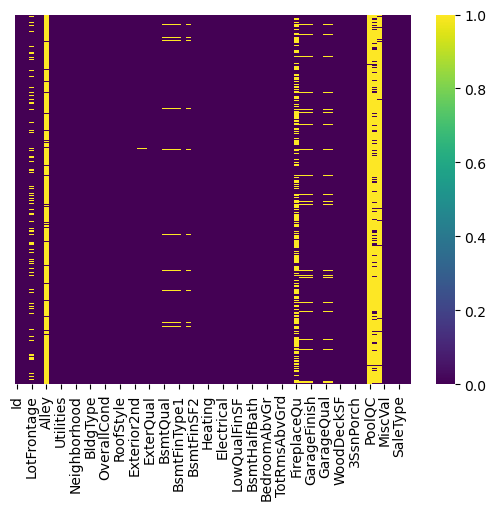

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis');

- we can see that there are so many missing values in Alley, PoolIQC, MiscFeatures, so we will just drop it.

In [11]:
df.drop(columns=['Alley', 'PoolQC', 'MiscFeature','Fence','FireplaceQu','Id','GarageYrBlt'], axis=1, inplace=True)

In [12]:
df.shape

(1460, 74)

In [13]:
### Filling missing Values
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
df['MasVnrType'].mode()[0]

'None'

In [15]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

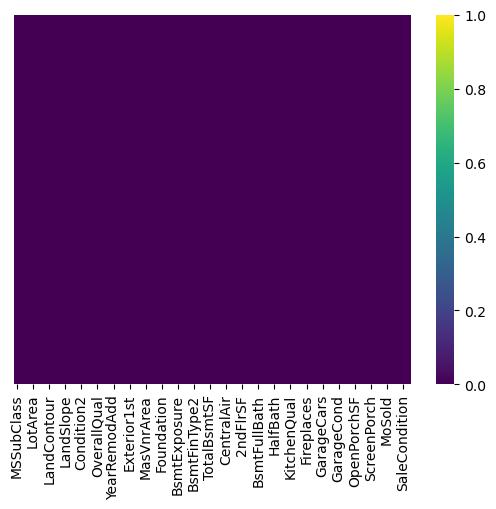

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis');

In [19]:
df.shape

(1460, 74)

In [20]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Exploratory Data Analysis(EDA)

In [22]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [23]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
YrSold [2008 2007 2006 2009 2010]


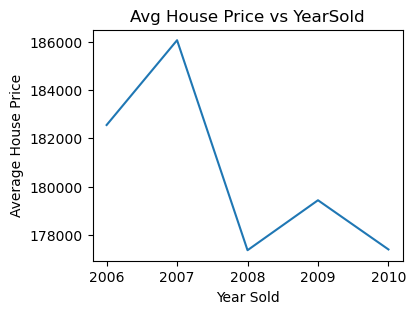

In [24]:
## checking whether there is a relation between year the house is sold and the avg sales price
plt.figure(figsize=(4,3))
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year Sold')
plt.ylabel('Average House Price')
plt.title("Avg House Price vs YearSold");

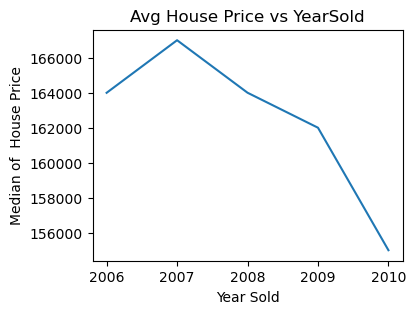

In [25]:
## checking whether there is a relation between year the house is sold and the  sales price
plt.figure(figsize=(4,3))
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median of  House Price')
plt.title("Avg House Price vs YearSold");

- Observations: We can see that the median values of house price were incresing but after 2007 onwrads it were decresing.

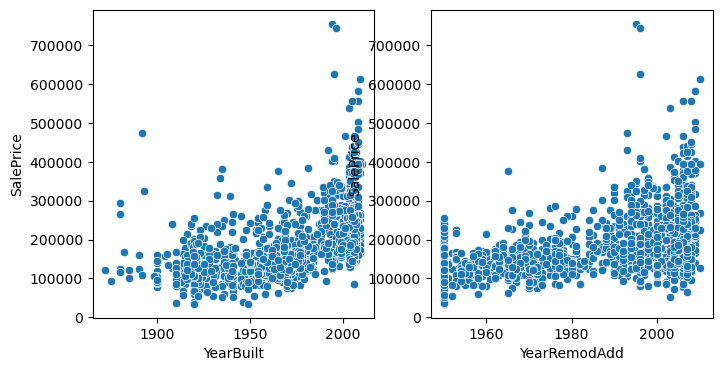

In [26]:
## relationship  between All years feature with SalePrice

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'YearBuilt', y='SalePrice', data=df)

plt.subplot(1,2,2)
sns.scatterplot(x = 'YearRemodAdd', y='SalePrice', data=df);

In [27]:
# list of discrete numerical variables
discrete_features =[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_features)))

df[discrete_features].head()

Discrete Variables Count: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [28]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

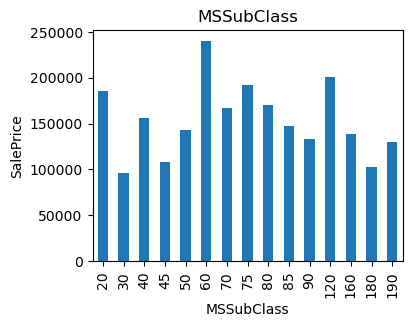

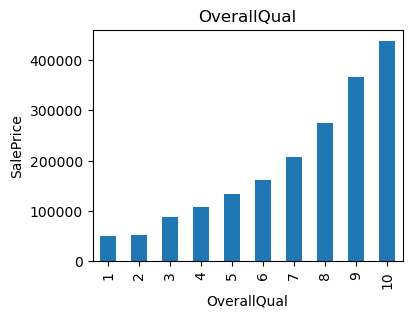

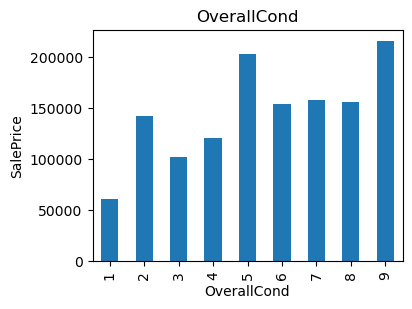

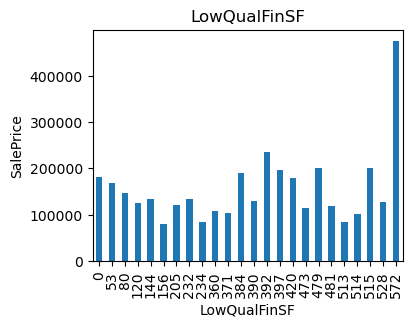

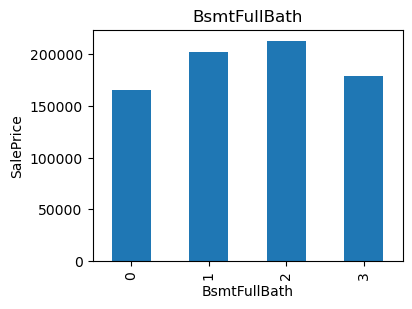

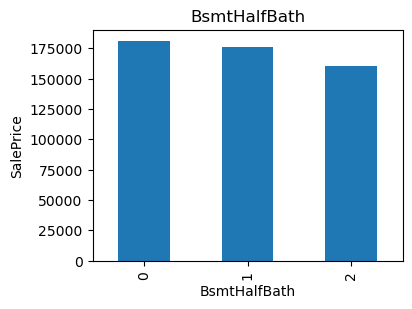

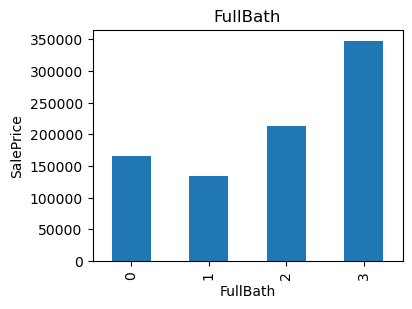

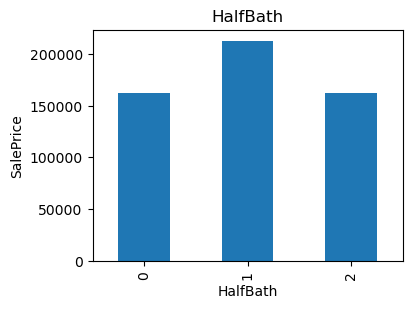

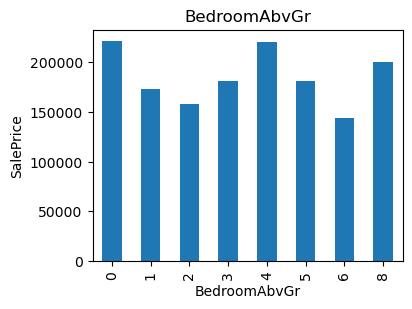

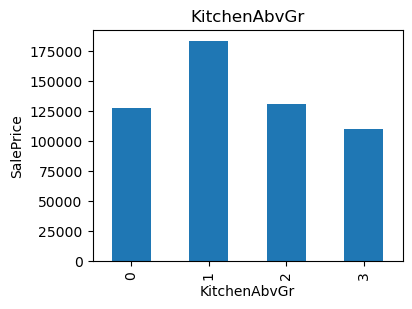

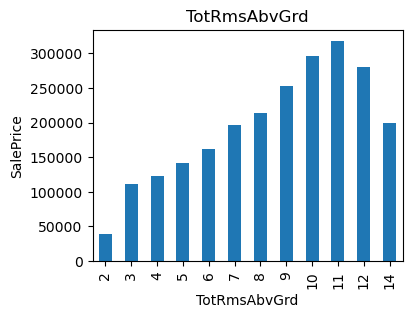

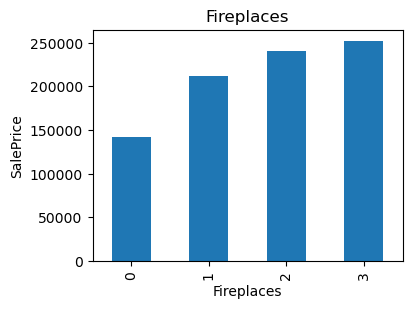

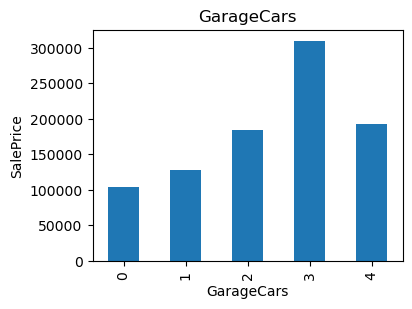

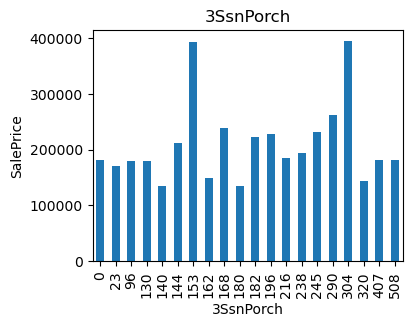

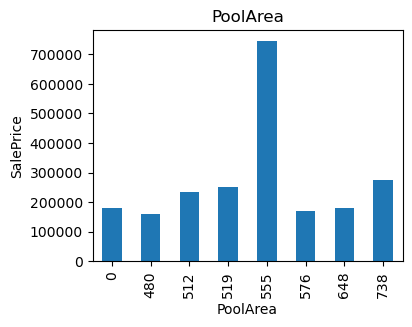

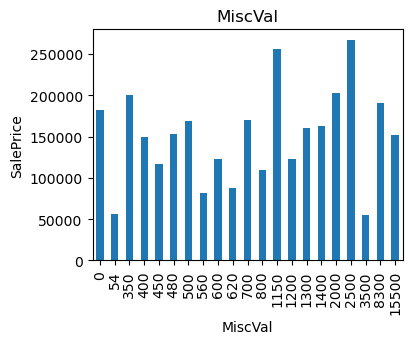

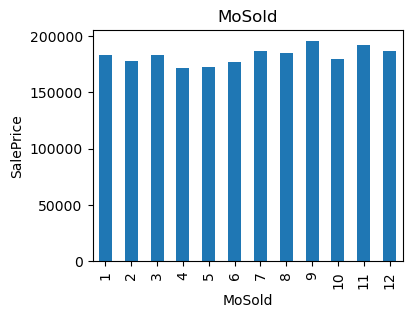

In [29]:
## Lets Find the realtionship between discrete variable and Avg Sale PRice

for feature in discrete_features:
    data=df.copy()
    plt.figure(figsize=(4,3))
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

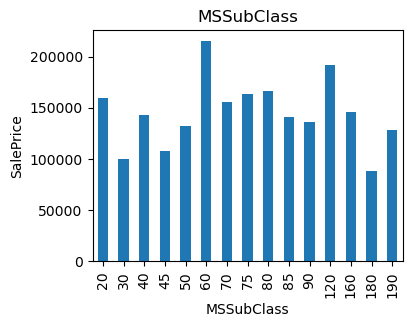

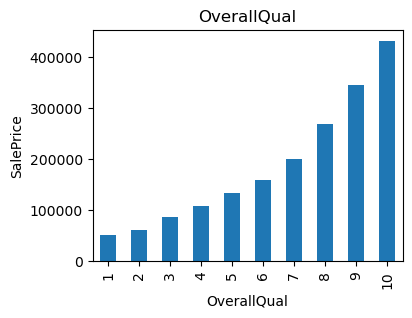

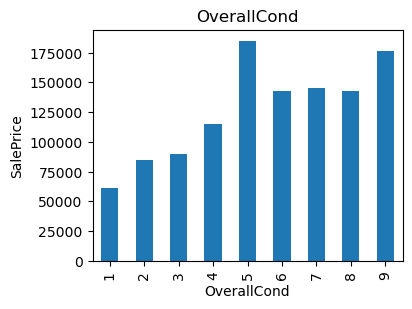

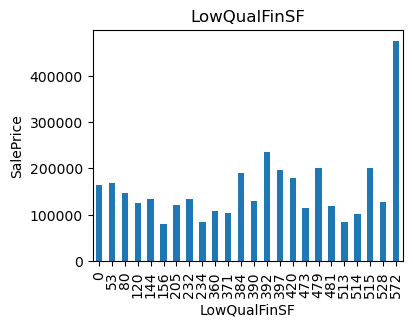

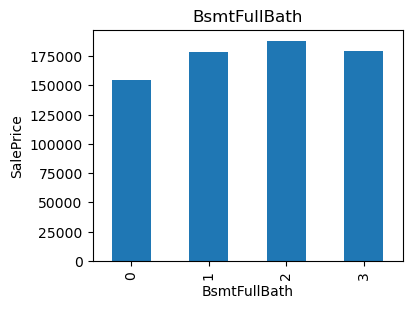

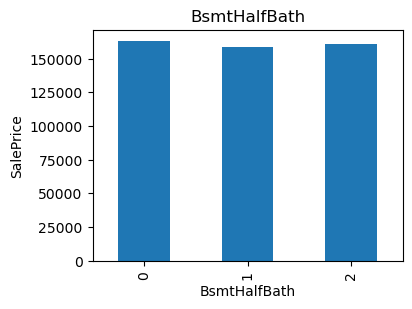

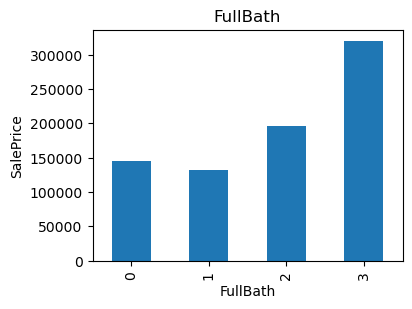

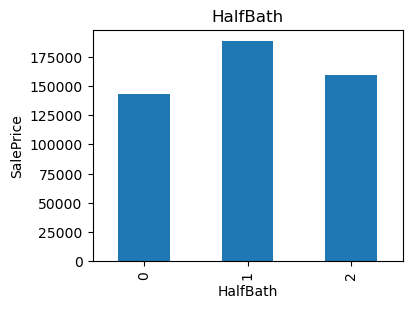

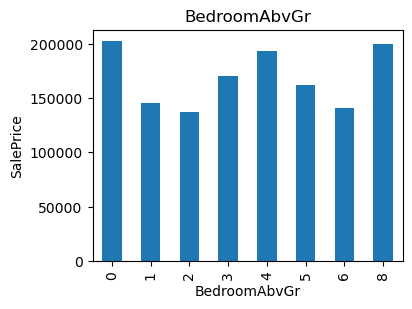

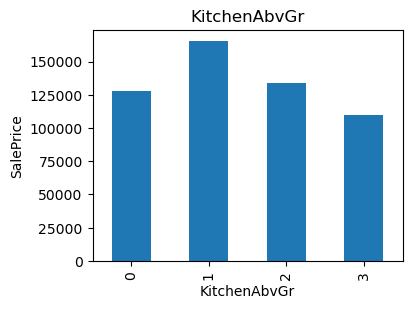

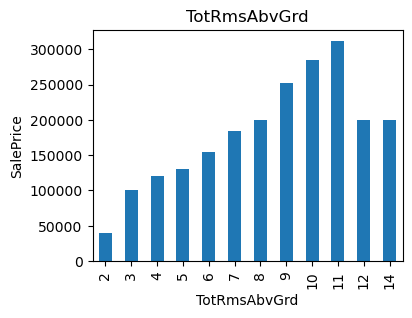

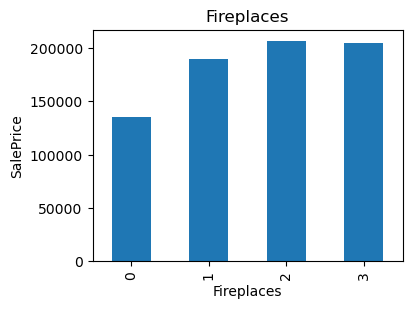

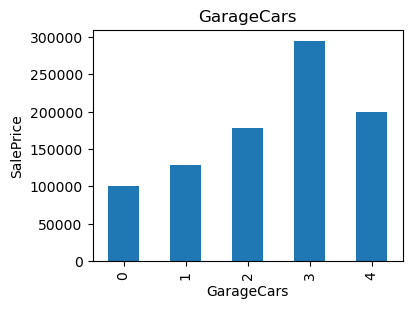

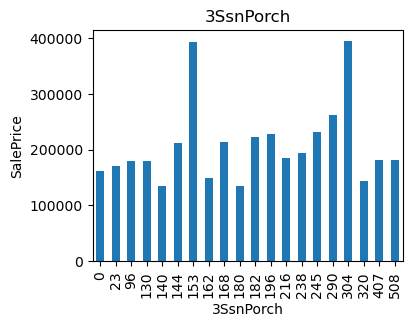

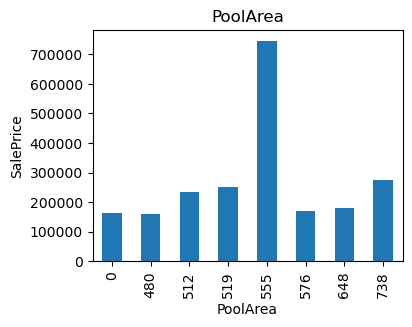

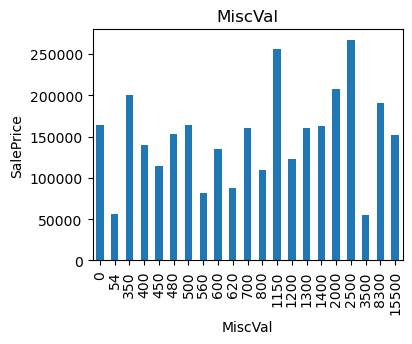

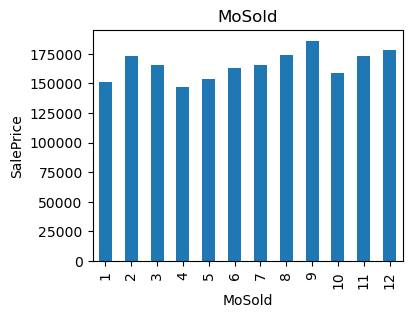

In [30]:
## Lets Find the realtionship between discrete variable and  Median of Sale PRice

for feature in discrete_features:
    data=df.copy()
    plt.figure(figsize=(4,3))
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [31]:
continuous_features =[feature for feature in numerical_features if feature not in discrete_features + year_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 16


In [32]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

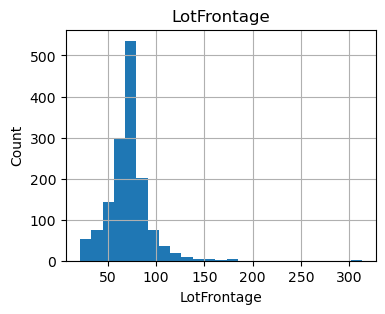

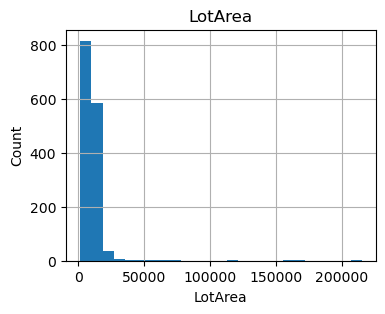

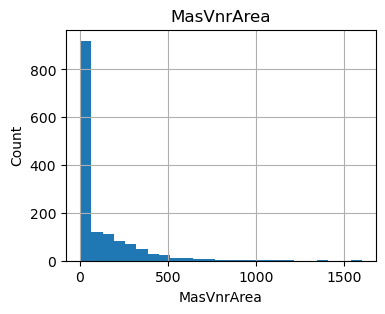

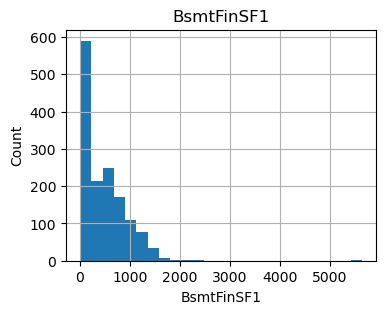

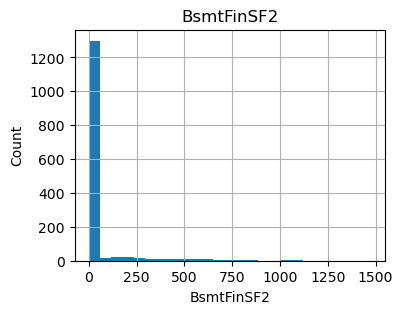

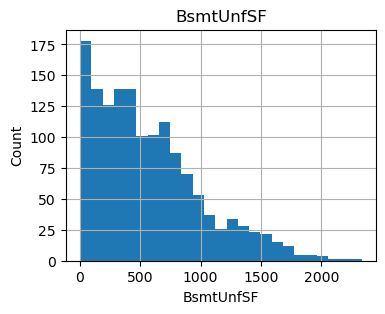

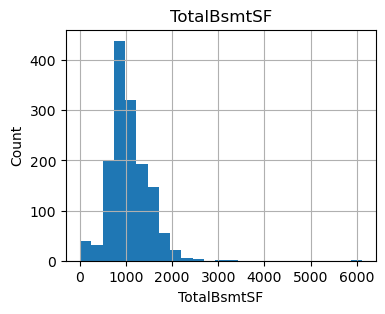

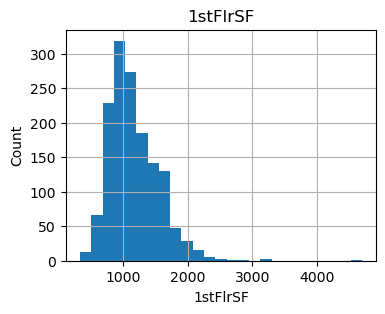

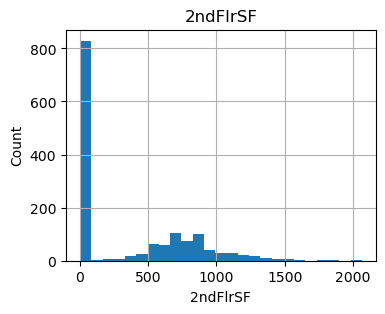

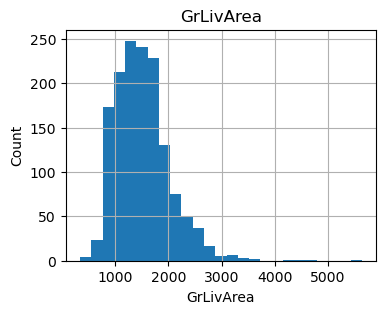

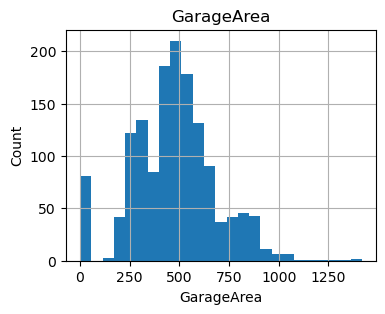

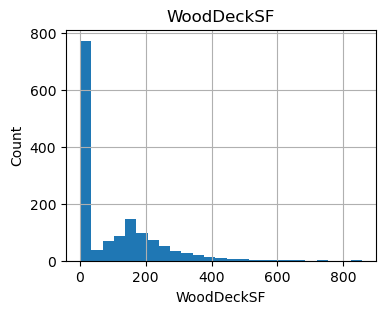

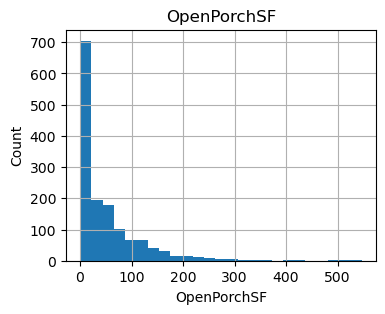

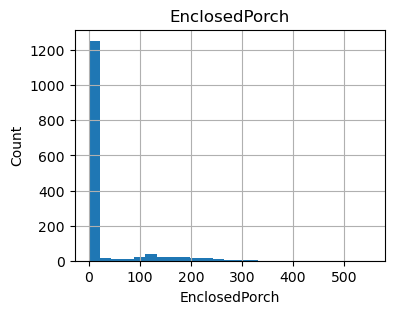

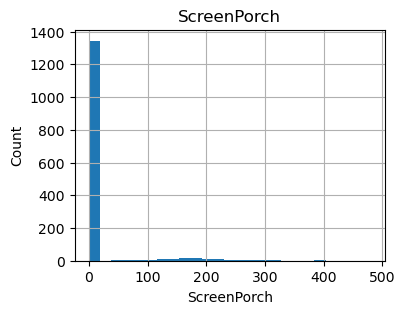

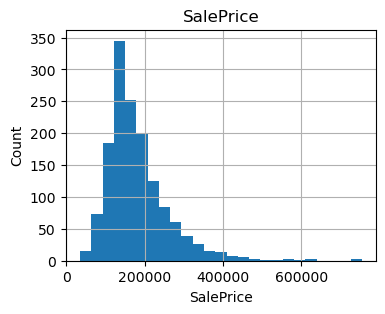

In [33]:
### Continuous var distribution
for feature in continuous_features:
    data=df.copy()
    plt.figure(figsize=(4,3))
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

- We can see that most of the features are skewd and its following rightly skewed distribution,which also indicates the outliers present, so next we will remove it.

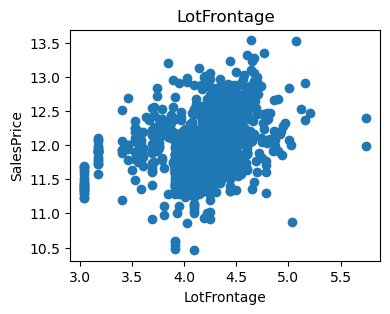

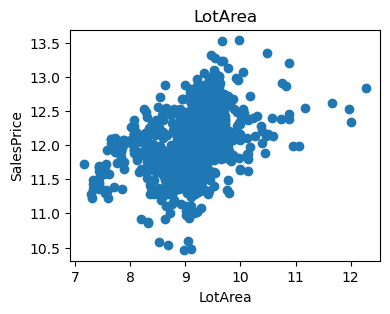

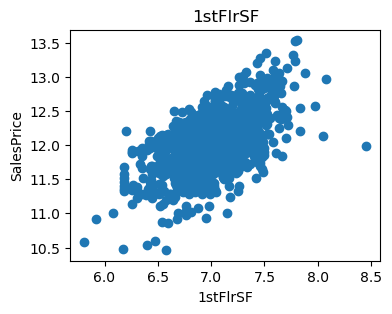

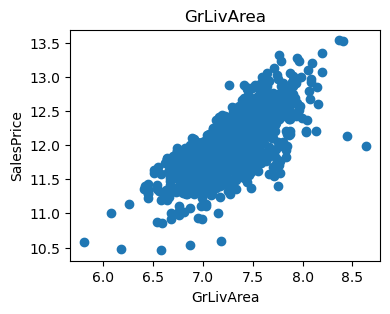

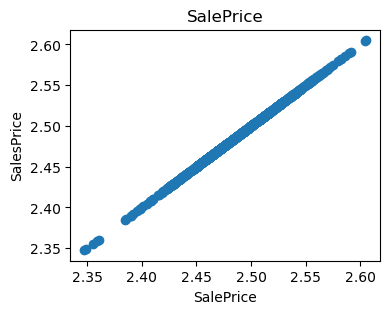

In [34]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.figure(figsize=(4,3))
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

In [35]:
### Categorical variable
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print("Discrete Variables Count: {}".format(len(categorical_features)))

df[categorical_features].head()

Discrete Variables Count: 38


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [36]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

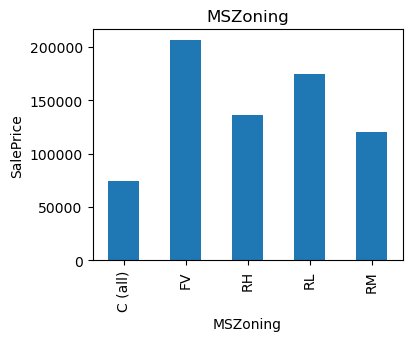

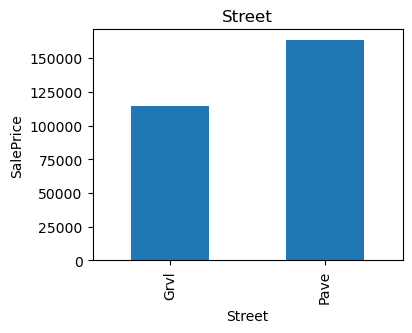

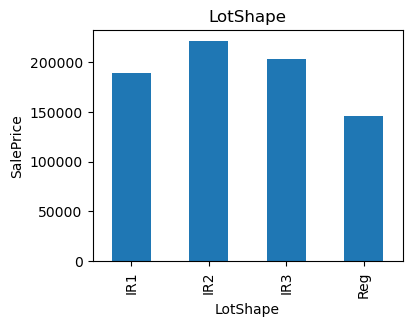

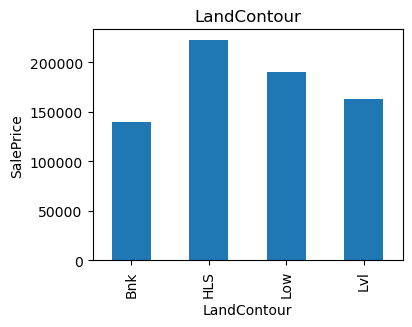

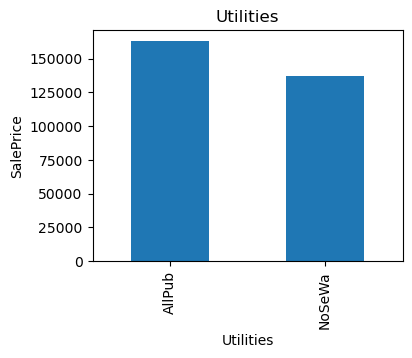

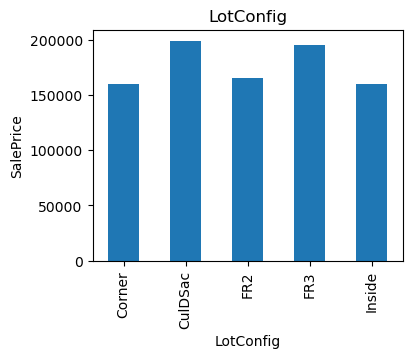

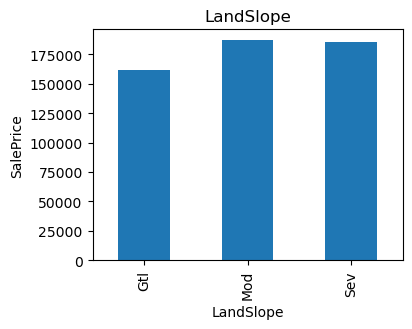

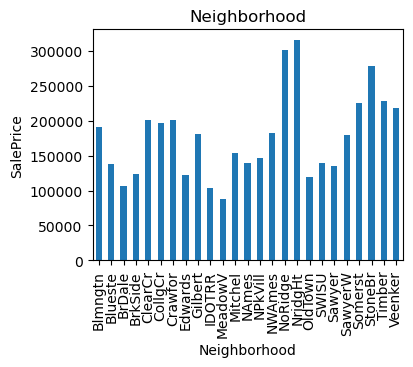

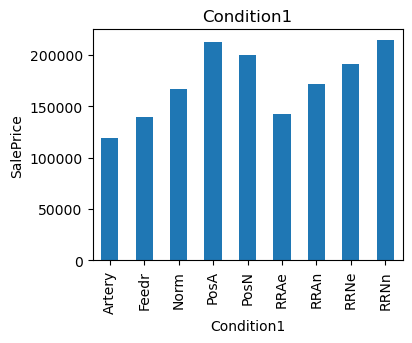

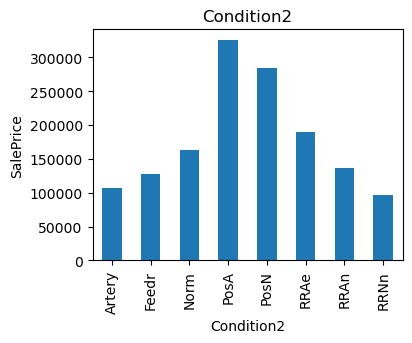

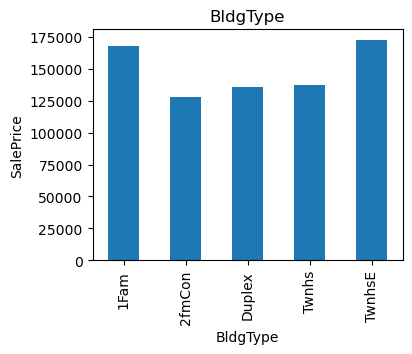

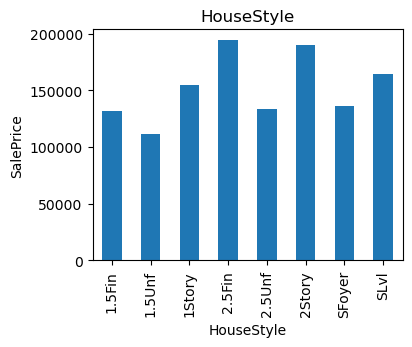

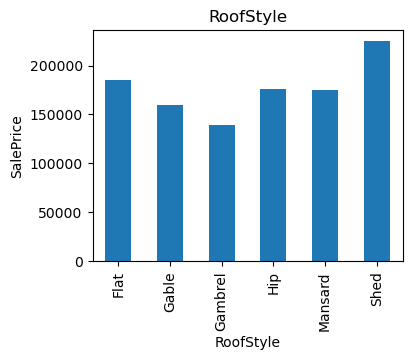

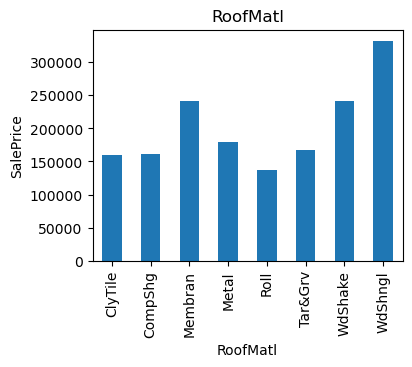

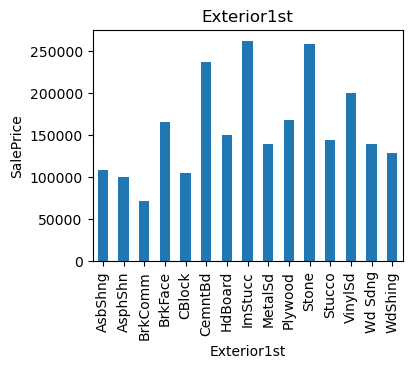

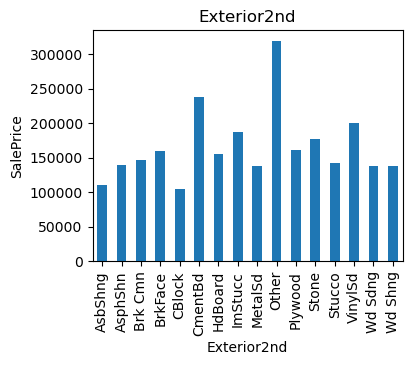

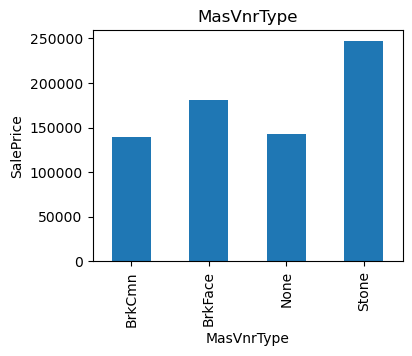

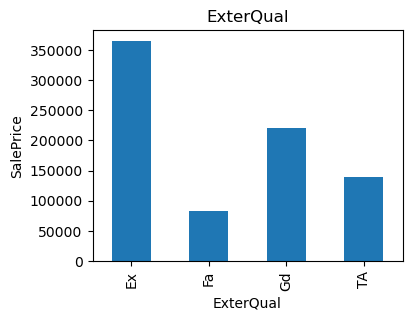

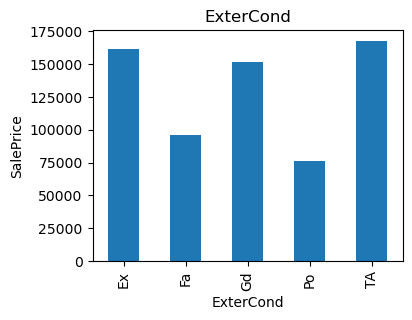

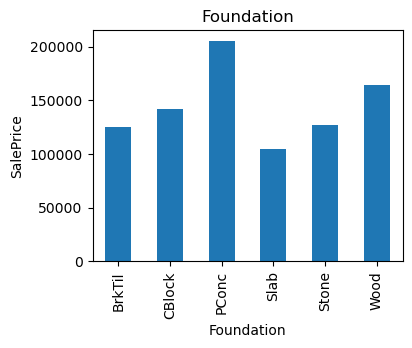

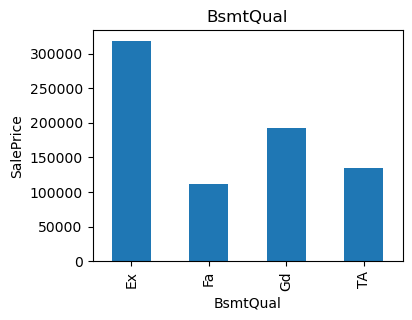

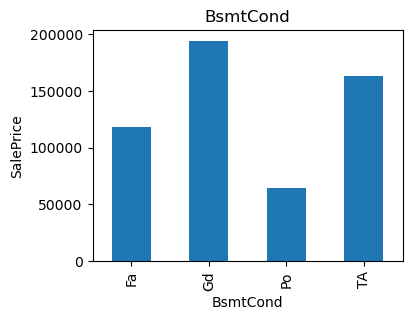

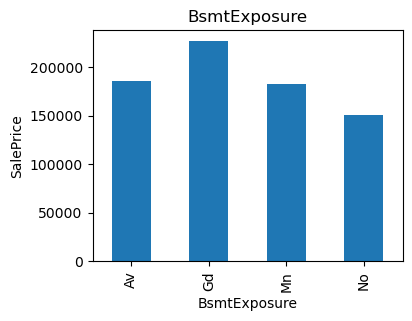

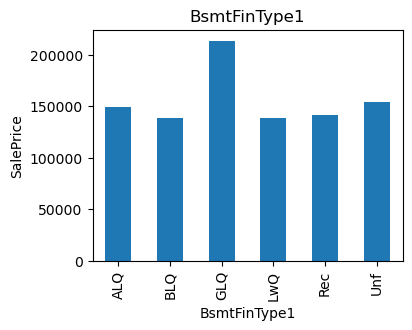

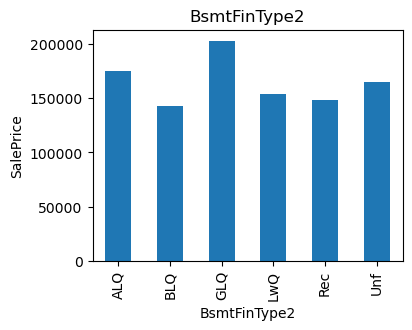

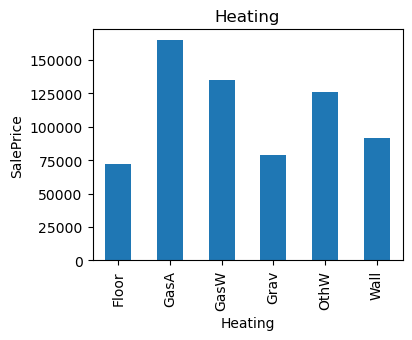

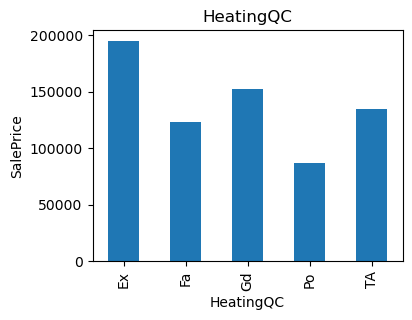

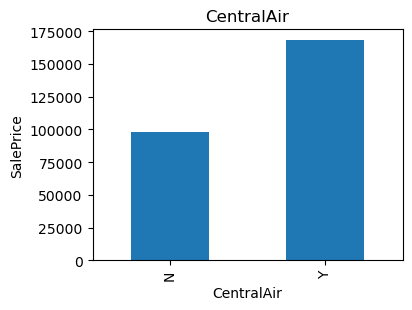

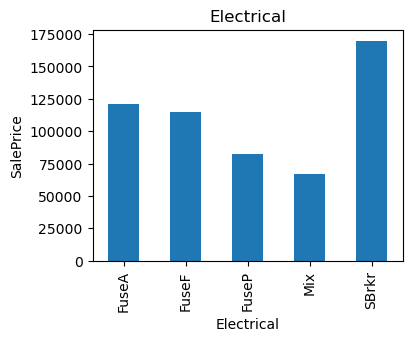

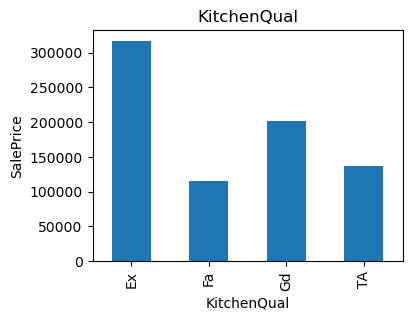

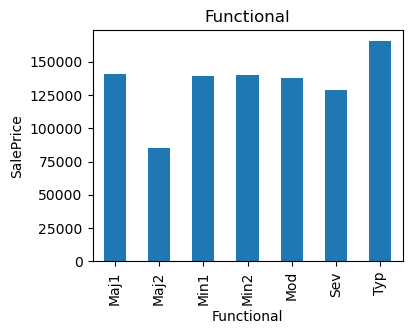

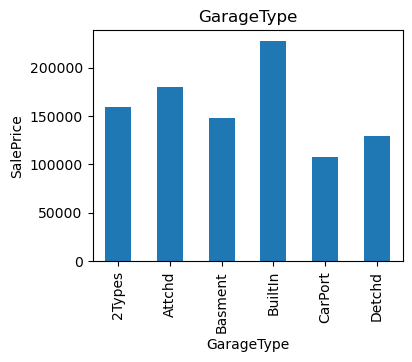

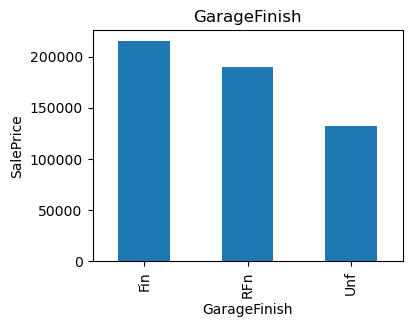

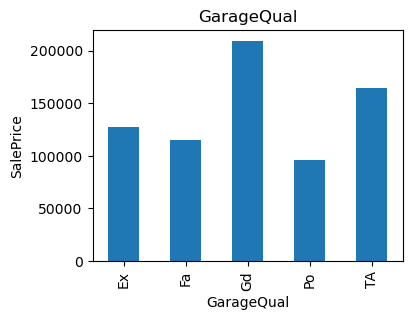

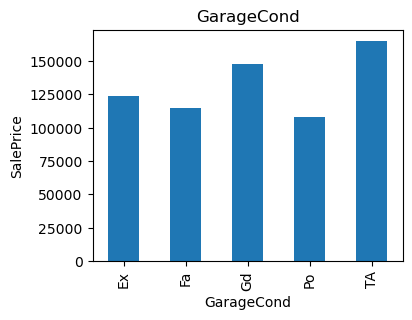

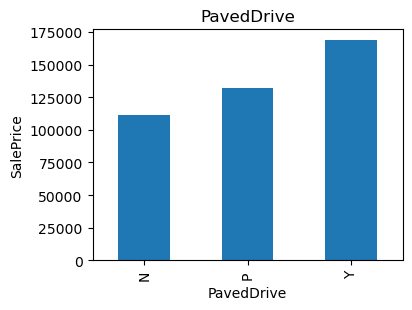

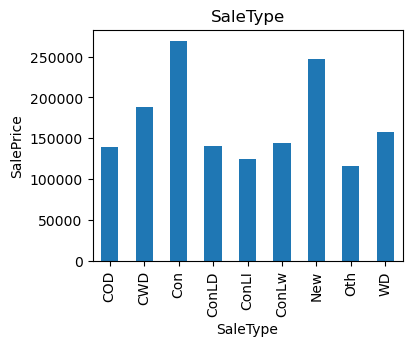

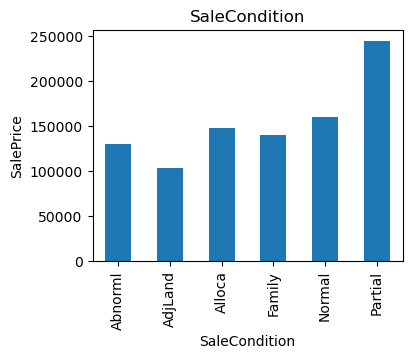

In [37]:
for feature in categorical_features:
    plt.figure(figsize=(4,3))
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [38]:
print(df.shape)
df.head()

(1460, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
df = pd.get_dummies(df, drop_first=True)
print(df.shape)

(1460, 232)


**Splitting the features and target variable**
- **X &y**

In [40]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [41]:
print(X.shape, y.shape)

(1460, 231) (1460,)


**Feature Selection**

In [42]:
# with the following function we can select highly correlated features
# It will remove the 1st features that is correlated with any other features

def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold: #we are intrested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X, 0.7)
print(len(set(corr_features)))
print(corr_features)

32
{'Foundation_PConc', 'GarageType_Detchd', 'BsmtFinType2_Unf', 'RoofStyle_Shed', 'Exterior2nd_VinylSd', 'MSZoning_RM', 'Exterior2nd_Stucco', 'Exterior2nd_Plywood', 'SaleType_WD', 'KitchenQual_TA', 'BsmtCond_TA', 'ExterQual_TA', 'TotRmsAbvGrd', 'GarageQual_TA', 'HouseStyle_2Story', 'ExterCond_TA', 'Exterior2nd_CBlock', 'HouseStyle_1Story', 'GarageArea', 'Exterior2nd_HdBoard', 'SaleCondition_Partial', '1stFlrSF', 'Heating_GasW', 'BsmtQual_TA', 'Exterior2nd_CmentBd', 'Neighborhood_Somerst', 'Electrical_Mix', 'GarageCond_TA', 'Exterior2nd_Wd Sdng', 'RoofStyle_Hip', 'MasVnrType_None', 'Exterior2nd_MetalSd'}


- we can see that there are 32 features which are highly correlated.

In [44]:
X = X.drop(corr_features, axis=1)

### Top 20 important features using ExtraTreeRegressor

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[3.69187416e-03 2.86994613e-03 7.96482145e-03 2.98125426e-01
 3.31282609e-03 4.18651563e-02 1.16337168e-02 4.43434213e-03
 1.61327559e-02 1.18021745e-03 2.93268542e-03 3.30943754e-02
 1.71173456e-02 2.45304641e-04 9.05482909e-02 5.51453215e-03
 6.55276361e-04 4.43511970e-02 3.75690943e-03 5.32019631e-03
 1.24641030e-03 1.96765966e-02 1.32375698e-01 3.73080807e-03
 3.44924965e-03 8.37560153e-04 7.13098910e-04 2.36523267e-03
 6.61254679e-04 1.54860769e-04 2.47189768e-03 2.16965512e-03
 5.03185172e-04 6.42251706e-05 4.40111642e-03 2.12037279e-05
 1.99273079e-03 1.60201475e-04 1.99963415e-03 7.01186760e-04
 1.06653985e-03 1.46552287e-03 2.60670470e-06 1.46397515e-03
 4.19895196e-04 4.46897979e-05 1.59941262e-03 1.44304310e-03
 1.44398723e-04 1.77439796e-05 9.07025755e-05 4.59346292e-04
 9.20771943e-04 7.54271654e-04 2.77692222e-03 2.91060475e-03
 6.12920623e-04 2.04087501e-04 2.54721010e-04 8.14312043e-04
 5.17204360e-04 1.45027936e-04 5.05939542e-04 1.50222020e-02
 1.92572417e-03 1.290791

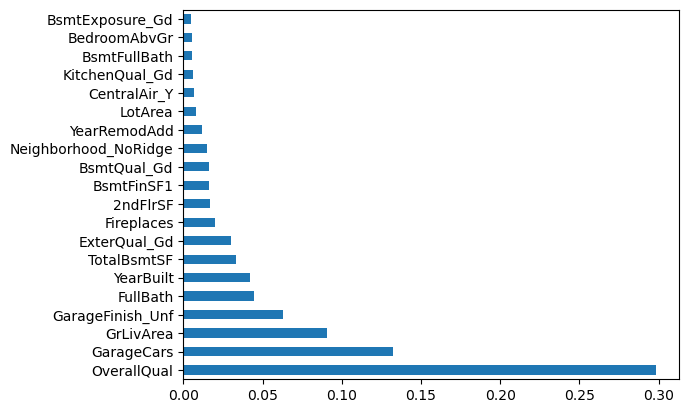

In [46]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [47]:
print(X.shape)

(1460, 199)


In [48]:
##Importing the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
##Creating a function to calculate best model for this problem
def find_best_model(X,y):
    models = {'linear_regression':{'model':LinearRegression(), 'parameters':{'normalize':[True, False]}},
             
              'lasso':{'model':Lasso(), 'parameters':{'alpha':[1,2],'selection':['random','cyclic']}},
              
              'elastic_net':{'model':ElasticNet(),'parameters':{'alpha':[0.1,0.2,1,2,3,5,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}},
             
             'decision_tree':{'model':DecisionTreeRegressor(random_state=0), 'parameters':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}},
             
             'random_forest':{'model':RandomForestRegressor(random_state=0), 'parameters':{'n_estimators':[5,10,15,20],'criterion':['mse','friedman_mse']}},
             'xgb_reg':{'model':XGBRegressor(), 'parameters':{'n_estimators': [20,50,100],'learning_rate': [0.05,0.1,0.5]}}}
    
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model': model_name,'best_parameters':gs.best_params_, 'score':gs.best_score_})
    return pd.DataFrame(scores, columns=['model','best_parameters', 'score'])

find_best_model(X,y)

,model,best_parameters,score
0,linear_regression,{'normalize': False},0.669954
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.686648
2,elastic_net,"{'alpha': 0.2, 'l1_ratio': 0.95}",0.833460
3,decision_tree,"{'criterion': 'mse', 'splitter': 'best'}",0.718727
4,random_forest,"{'criterion': 'mse', 'n_estimators': 20}",0.849281
5,xgb_reg,"{'learning_rate': 0.1, 'n_estimators': 100}",0.873775


In [50]:
# Using cross_val_score for gaining highest accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(random_state=0,criterion='mse', n_estimators=20), X,y, cv=5)
print('Cross Validation Score:{}%'.format(round(sum(scores)*100/len(scores)),3))

Cross Validation Score:85%


In [51]:
#Splitting the dataset into train and test samples.
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, X_test.shape)

(1022, 199) (438, 199)


In [52]:
###Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# Creating RandomForestRegressor Model
model = RandomForestRegressor(random_state=0,criterion='mse', n_estimators=20)
model.fit(X_train, y_train)

#prediction on X_train, X_test
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#score
print('Test R2-Score:', model.score(X_test, y_test))

Test R2-Score: 0.8934369800875928


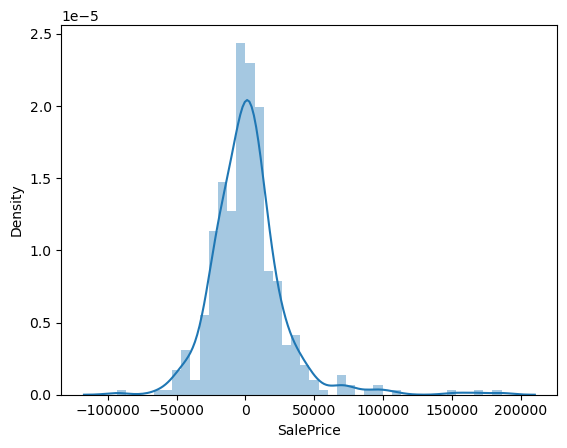

In [63]:
sns.distplot(y_test-ypred_test)
plt.show()

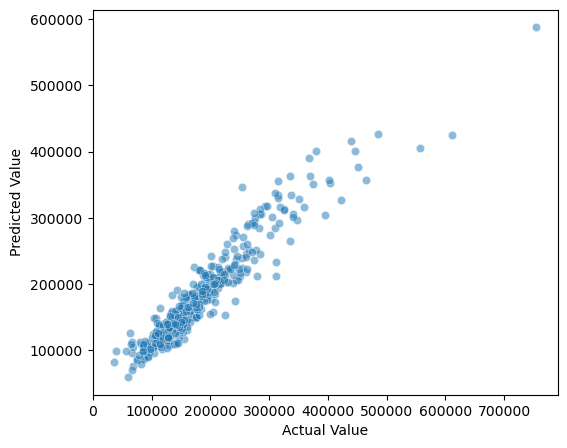

In [55]:
plt.figure(figsize=(6,5))
sns.scatterplot(y_test, ypred_test, alpha=0.5)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [65]:
import pickle
#create a file, where we want to save the model
file = open('HP_lr.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)